In [1]:
#In this notebook we compute the feature importance of our models and plot Partial Dependence Plots (PDPs)

In [2]:
#Have to downgrade numpy because of shap..
#!pip install --upgrade numpy==1.21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.inspection import permutation_importance
import xgboost
import shap
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [2]:
finalx_test_df = pd.read_pickle('./X_test.pickle')
finaly_test_df = pd.read_pickle('./y_test.pickle')
del finalx_test_df['asin']
del finaly_test_df['asin']

In [3]:
y_test=finaly_test_df.to_numpy()
y_test=y_test[:,0]

In [4]:
X_test=finalx_test_df.to_numpy()

In [10]:
features_names=["number of reviews", "review rating mean", "review rating mean weigthed by verification", "number of verified reviews","mean rank of 1st month", "mean rank of 2nd month", "mean rank of 3rd month", "median rank of 1st month", "median rank of 2nd month", "median rank of 3rd month", "min rank of 1st month", "min rank of 2nd month", "min rank of 3rd month", "mean rank", "median rank", "minimum rank"]

In [11]:
#We first study the scikit Xgboost model using scikit permutation_importance and then with SHAP
forest_scikit = joblib.load('./RandomForestBestModel_FullFeatures_Val.sav')
xgboost_scikit = joblib.load('./XgboostBestModel_FullFeatures_Val.sav')

In [12]:
perm_importance_forest = permutation_importance(forest_scikit, X_test, y_test)
perm_importance_xgboost = permutation_importance(xgboost_scikit, X_test, y_test)

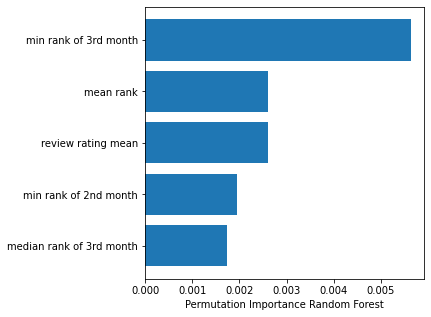

In [38]:
sorted_idx = perm_importance_forest.importances_mean.argsort()
features_names_forest=[features_names[i] for i in sorted_idx]
plt.figure(figsize=(5,5))
plt.barh(features_names_forest[11:], perm_importance_forest.importances_mean[sorted_idx[11:]])
plt.xlabel("Permutation Importance Random Forest")
plt.savefig('./Partial_Dependence_Plots_Validation/FeatureImportance_Forest_Val_Perm_SmallPlot.png')

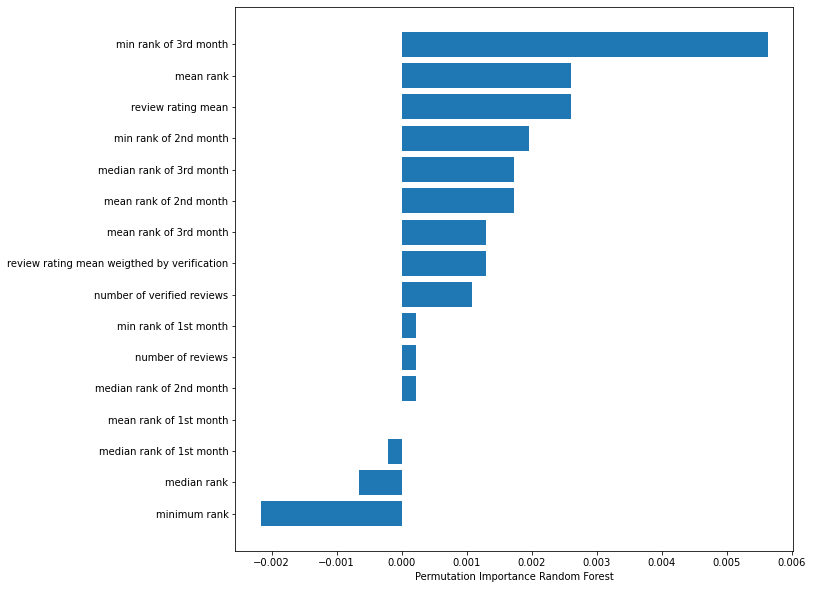

In [30]:
sorted_idx = perm_importance_forest.importances_mean.argsort()
features_names_forest=[features_names[i] for i in sorted_idx]
plt.figure(figsize=(10,10))
plt.barh(features_names_forest, perm_importance_forest.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance Random Forest")
plt.savefig('./Partial_Dependence_Plots_Validation/FeatureImportance_Forest_Val_Perm.png')

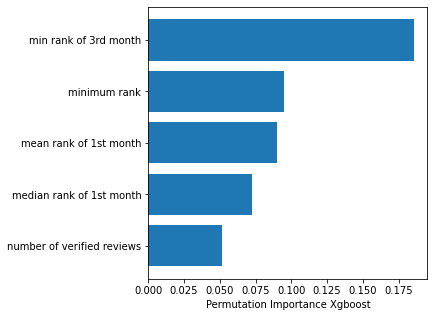

In [37]:
sorted_idx = perm_importance_xgboost.importances_mean.argsort()
features_names_xgboost=[features_names[i] for i in sorted_idx]
plt.figure(figsize=(5,5))
plt.barh(features_names_xgboost[11:], perm_importance_xgboost.importances_mean[sorted_idx[11:]])
plt.xlabel("Permutation Importance Xgboost")
plt.savefig('./Partial_Dependence_Plots_Validation/FeatureImportance_Xgboost_Val_Perm_SmallPlot.png')

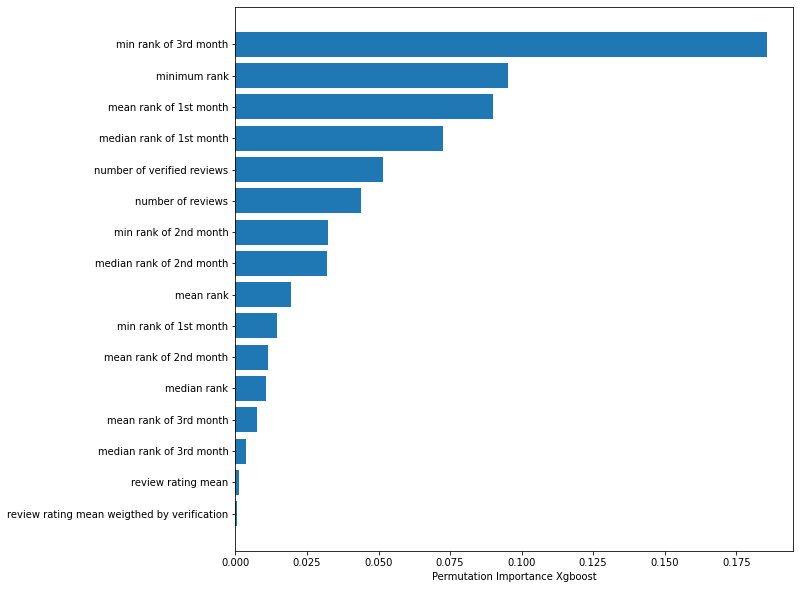

In [14]:
sorted_idx = perm_importance_xgboost.importances_mean.argsort()
features_names_xgboost=[features_names[i] for i in sorted_idx]
plt.figure(figsize=(10,10))
plt.barh(features_names_xgboost, perm_importance_xgboost.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance Xgboost")
plt.savefig('./Partial_Dependence_Plots_Validation/FeatureImportance_Xgboost_Val_Perm.png')

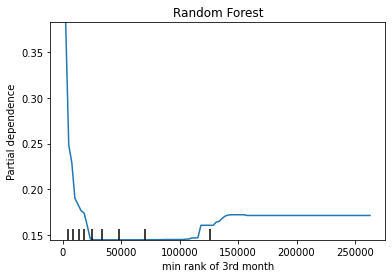

In [15]:
idx=features_names.index('min rank of 3rd month')
#Partial dependence plot
PartialDependenceDisplay.from_estimator(forest_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost for the minimum rank of the 3rd month')
plt.title('Random Forest')
plt.savefig('./Partial_Dependence_Plots_Validation/PartialDepPlot_Forest_Validation_MinRank3rdMonth.png')

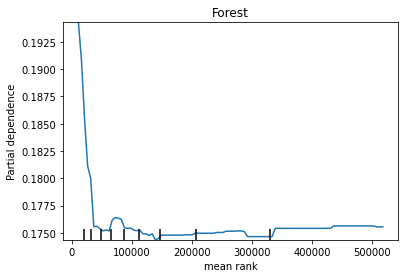

In [25]:
idx=features_names.index('mean rank')
#Partial dependence plot
PartialDependenceDisplay.from_estimator(forest_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost for rolling mean rank of 1st month')
plt.title('Forest')
plt.savefig('./Partial_Dependence_Plots_Validation/PartialDepPlot_Forest_Validation_MeanRank.png')

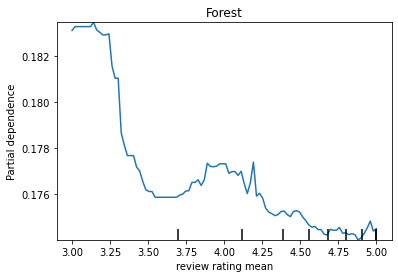

In [26]:
idx=features_names.index('review rating mean')
#Partial dependence plot
PartialDependenceDisplay.from_estimator(forest_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost for rolling mean rank of 1st month')
plt.title('Forest')
plt.savefig('./Partial_Dependence_Plots_Validation/PartialDepPlot_Forest_Validation_ReviewRatingMean.png')

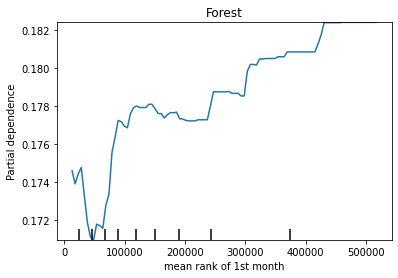

In [16]:
idx=features_names.index('mean rank of 1st month')
#Partial dependence plot
PartialDependenceDisplay.from_estimator(forest_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost for rolling mean rank of 1st month')
plt.title('Forest')
plt.savefig('./Partial_Dependence_Plots_Validation/PartialDepPlot_Forest_Validation_MeanRank1stMonth.png')

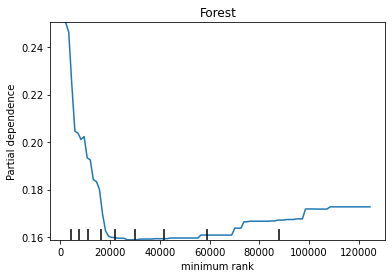

In [17]:
idx=features_names.index('minimum rank')
#Partial dependence plot
PartialDependenceDisplay.from_estimator(forest_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost for rolling minimum rank over 3 months')
plt.title('Forest')
plt.savefig('./Partial_Dependence_Plots/PartialDepPlot_Forest_Validation_MinRank.png')

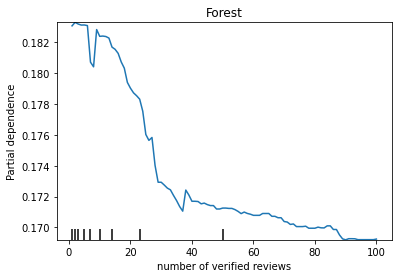

In [18]:
idx=features_names.index('number of verified reviews')
#Partial dependence plot
PartialDependenceDisplay.from_estimator(forest_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost number of verified reviews over 3 monthx')
plt.title('Forest')
plt.savefig('./Partial_Dependence_Plots/PartialDepPlot_Forest_Validation_NumberVerifiedReviews.png')

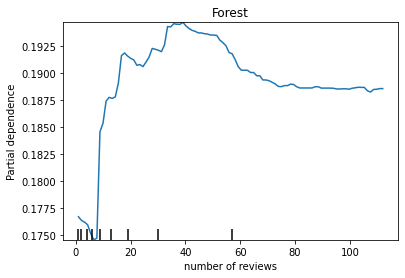

In [19]:
idx=features_names.index('number of reviews')
#Partial dependence plot
PartialDependenceDisplay.from_estimator(forest_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost number of reviews over 3 months')
plt.title('Forest')
plt.savefig('./Partial_Dependence_Plots/PartialDepPlot_Forest_Validation_NumberReviews.png')

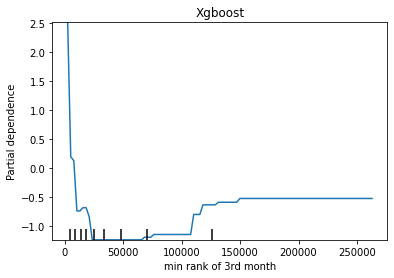

In [20]:
idx=features_names.index('min rank of 3rd month')
#Partial dependence plot
PartialDependenceDisplay.from_estimator(xgboost_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost for the minimum rank of the 3rd month')
plt.title('Xgboost')
plt.savefig('./Partial_Dependence_Plots_Validation/PartialDepPlot_Xgboost_Validation_MinRank3rdMonth.png')

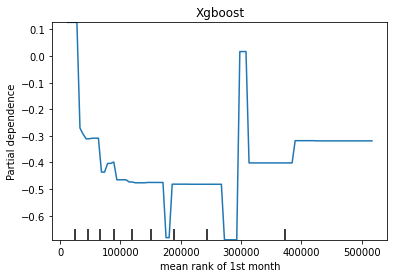

In [21]:
idx=features_names.index('mean rank of 1st month')
#Partial dependence plot
PartialDependenceDisplay.from_estimator(xgboost_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost for rolling mean rank of 1st month')
plt.title('Xgboost')
plt.savefig('./Partial_Dependence_Plots_Validation/PartialDepPlot_Xgboost_Validation_MeanRank1stMonth.png')

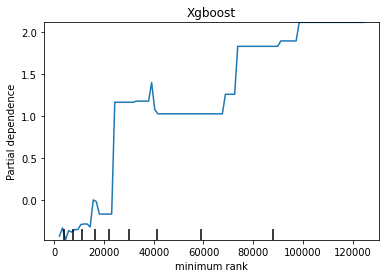

In [22]:
idx=features_names.index('minimum rank')
#Partial dependence plot
PartialDependenceDisplay.from_estimator(xgboost_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost for rolling minimum rank over 3 months')
plt.title('Xgboost')
plt.savefig('./Partial_Dependence_Plots/PartialDepPlot_Xgboost_Validation_MinRank.png')

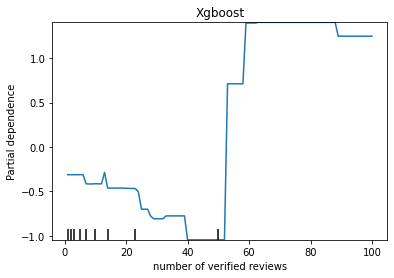

In [23]:
idx=features_names.index('number of verified reviews')
#Partial dependence plot
PartialDependenceDisplay.from_estimator(xgboost_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost number of verified reviews over 3 monthx')
plt.title('Xgboost')
plt.savefig('./Partial_Dependence_Plots/PartialDepPlot_Xgboost_Validation_NumberVerifiedReviews.png')

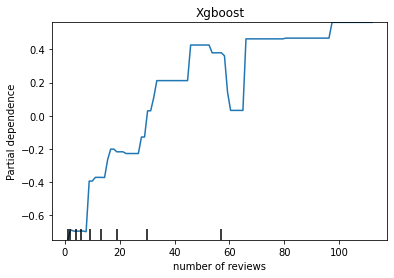

In [24]:
idx=features_names.index('number of reviews')
#Partial dependence plot
PartialDependenceDisplay.from_estimator(xgboost_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost number of reviews over 3 months')
plt.title('Xgboost')
plt.savefig('./Partial_Dependence_Plots/PartialDepPlot_Xgboost_Validation_NumberReviews.png')

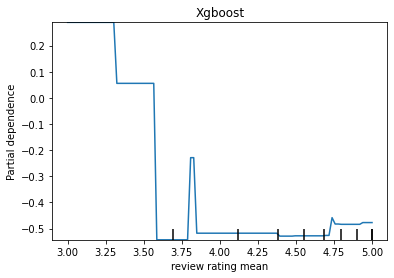

In [39]:
idx=features_names.index('review rating mean')
#Partial dependence plot
PartialDependenceDisplay.from_estimator(xgboost_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost for rolling mean rank of 1st month')
plt.title('Xgboost')
plt.savefig('./Partial_Dependence_Plots_Validation/PartialDepPlot_Xgboost_Validation_ReviewRatingMean.png')